# This code is to find out the different of each epoch and batch size combination

In [28]:
import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Path

In [29]:
'''find the Model path'''
# find the current path
current_path = os.getcwd()
print('The current path is:', current_path)

# find the parent path
parent_path = Path(current_path).parent
print('The parent path is:', parent_path)

# find the data path
data_path1 = parent_path / 'Data/googlenet_nosync1_mod1'
data_path2 = parent_path / 'Data/googlenet_nosync1_mod2'
data_path3 = parent_path / 'Data/googlenet_nosync1_mod3'
data_path4 = parent_path / 'Data/googlenet_nosync1_mod4'
print('The data path is:', data_path1, data_path2, data_path3)

The current path is: /home/yj/FinalThesis/GreenAI/Cloud/3060_95W/code
The parent path is: /home/yj/FinalThesis/GreenAI/Cloud/3060_95W
The data path is: /home/yj/FinalThesis/GreenAI/Cloud/3060_95W/Data/googlenet_nosync1_mod1 /home/yj/FinalThesis/GreenAI/Cloud/3060_95W/Data/googlenet_nosync1_mod2 /home/yj/FinalThesis/GreenAI/Cloud/3060_95W/Data/googlenet_nosync1_mod3


### extract data

In [30]:
fashion_path = 'fashion_mnist'
cifar_path = 'cifar100'

In [31]:
batch_sizes = [64]
epochs = [3]
rounds = 1
folder_name = f"E{epochs[0]}_B{batch_sizes[0]}_R{rounds-1}"
print(folder_name)

E3_B64_R0


In [32]:
f_path = fashion_path + '/' + folder_name
c_path = cifar_path + '/' + folder_name
print(f_path, c_path)

fashion_mnist/E3_B64_R0 cifar100/E3_B64_R0


#### read all the data from all the folders

In [33]:
# find the files path
mod1_path_f = data_path1 / f_path
mod2_path_f = data_path2 / f_path    
mod3_path_f = data_path3 / f_path
mod4_path_f = data_path4 / f_path
print('The model path is:', mod1_path_f,'\n',
                            mod2_path_f,'\n',
                            mod3_path_f,'\n',
                            mod4_path_f)
print('*'*50)
mod1_path_c = data_path1 / c_path
mod2_path_c = data_path2 / c_path
mod3_path_c = data_path3 / c_path
mod4_path_c = data_path4 / c_path
print('The model path is:', mod1_path_c,'\n',
                            mod2_path_c,'\n',
                            mod3_path_c,'\n',
                            mod4_path_c)

The model path is: /home/yj/FinalThesis/GreenAI/Cloud/3060_95W/Data/googlenet_nosync1_mod1/fashion_mnist/E3_B64_R0 
 /home/yj/FinalThesis/GreenAI/Cloud/3060_95W/Data/googlenet_nosync1_mod2/fashion_mnist/E3_B64_R0 
 /home/yj/FinalThesis/GreenAI/Cloud/3060_95W/Data/googlenet_nosync1_mod3/fashion_mnist/E3_B64_R0 
 /home/yj/FinalThesis/GreenAI/Cloud/3060_95W/Data/googlenet_nosync1_mod4/fashion_mnist/E3_B64_R0
**************************************************
The model path is: /home/yj/FinalThesis/GreenAI/Cloud/3060_95W/Data/googlenet_nosync1_mod1/cifar100/E3_B64_R0 
 /home/yj/FinalThesis/GreenAI/Cloud/3060_95W/Data/googlenet_nosync1_mod2/cifar100/E3_B64_R0 
 /home/yj/FinalThesis/GreenAI/Cloud/3060_95W/Data/googlenet_nosync1_mod3/cifar100/E3_B64_R0 
 /home/yj/FinalThesis/GreenAI/Cloud/3060_95W/Data/googlenet_nosync1_mod4/cifar100/E3_B64_R0


In [34]:
# for each path, there is fashionMNIST dataset and CIFAR100 dataset, stored in different folders
# find the files in the folder
mod_path_f = [mod1_path_f, mod2_path_f, mod3_path_f, mod4_path_f]
mod_path_c = [mod1_path_c, mod2_path_c, mod3_path_c, mod4_path_c]
for i in range(4):
    # find the files in the folder
    files_f = os.listdir(mod_path_f[i])
    files_c = os.listdir(mod_path_c[i])
    print(f'The files in the folder {mod_path_f[i]} and folder {mod_path_c[i]} are: {files_f}, {files_c}')

The files in the folder /home/yj/FinalThesis/GreenAI/Cloud/3060_95W/Data/googlenet_nosync1_mod1/fashion_mnist/E3_B64_R0 and folder /home/yj/FinalThesis/GreenAI/Cloud/3060_95W/Data/googlenet_nosync1_mod1/cifar100/E3_B64_R0 are: ['Train_part_time.npy', 'Epoch_time.npy', 'Train_acc.npy', 'Epoch_energy.npy', 'Test_acc.npy'], ['Train_part_time.npy', 'Epoch_time.npy', 'Train_acc.npy', 'Epoch_energy.npy', 'Test_acc.npy']
The files in the folder /home/yj/FinalThesis/GreenAI/Cloud/3060_95W/Data/googlenet_nosync1_mod2/fashion_mnist/E3_B64_R0 and folder /home/yj/FinalThesis/GreenAI/Cloud/3060_95W/Data/googlenet_nosync1_mod2/cifar100/E3_B64_R0 are: ['Train_part_time.npy', 'Epoch_time.npy', 'Train_acc.npy', 'Epoch_energy.npy', 'Test_acc.npy'], ['Train_part_time.npy', 'Epoch_time.npy', 'Train_acc.npy', 'Epoch_energy.npy', 'Test_acc.npy']
The files in the folder /home/yj/FinalThesis/GreenAI/Cloud/3060_95W/Data/googlenet_nosync1_mod3/fashion_mnist/E3_B64_R0 and folder /home/yj/FinalThesis/GreenAI/Clou

## Load files

### fashionmnist

In [35]:
# read all the files in all the folders
# TrainPartTime
TrainPartTime_mod1f = np.load(mod_path_f[0] / 'Train_part_time.npy', allow_pickle=True)
TrainPartTime_mod2f = np.load(mod_path_f[1] / 'Train_part_time.npy', allow_pickle=True)
TrainPartTime_mod3f = np.load(mod_path_f[2] / 'Train_part_time.npy', allow_pickle=True)
TrainPartTime_mod4f = np.load(mod_path_f[3] / 'Train_part_time.npy', allow_pickle=True)
# EpochTime
EpochTime_mod1f = np.load(mod_path_f[0] / 'Epoch_time.npy', allow_pickle=True)
EpochTime_mod2f = np.load(mod_path_f[1] / 'Epoch_time.npy', allow_pickle=True)
EpochTime_mod3f = np.load(mod_path_f[2] / 'Epoch_time.npy', allow_pickle=True)
EpochTime_mod4f = np.load(mod_path_f[3] / 'Epoch_time.npy', allow_pickle=True)
# EpochEnergy
EpochEnergy_mod1f = np.load(mod_path_f[0] / 'Epoch_energy.npy', allow_pickle=True)
EpochEnergy_mod2f = np.load(mod_path_f[1] / 'Epoch_energy.npy', allow_pickle=True)
EpochEnergy_mod3f = np.load(mod_path_f[2] / 'Epoch_energy.npy', allow_pickle=True)
EpochEnergy_mod4f = np.load(mod_path_f[3] / 'Epoch_energy.npy', allow_pickle=True)

# print(f'LayersTime_mod1f: {LayersTime_mod1f}','\n',
#       f'LayersTime_mod2f: {LayersTime_mod2f}','\n',
#       f'LayersTime_mod3f: {LayersTime_mod3f}','\n',
#       f'LayersTime_mod4f: {LayersTime_mod4f}')

#### TrainPartTime

In [36]:
TrainPartName = ['TimeToDevice', 'Forward', 'Backward', 'Test']

In [37]:
TrainPartTime_flist = [TrainPartTime_mod1f, TrainPartTime_mod2f, TrainPartTime_mod3f, TrainPartTime_mod4f]

/tmp/ipykernel_48875/2325149302.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(TrainPartName, rotation=45)


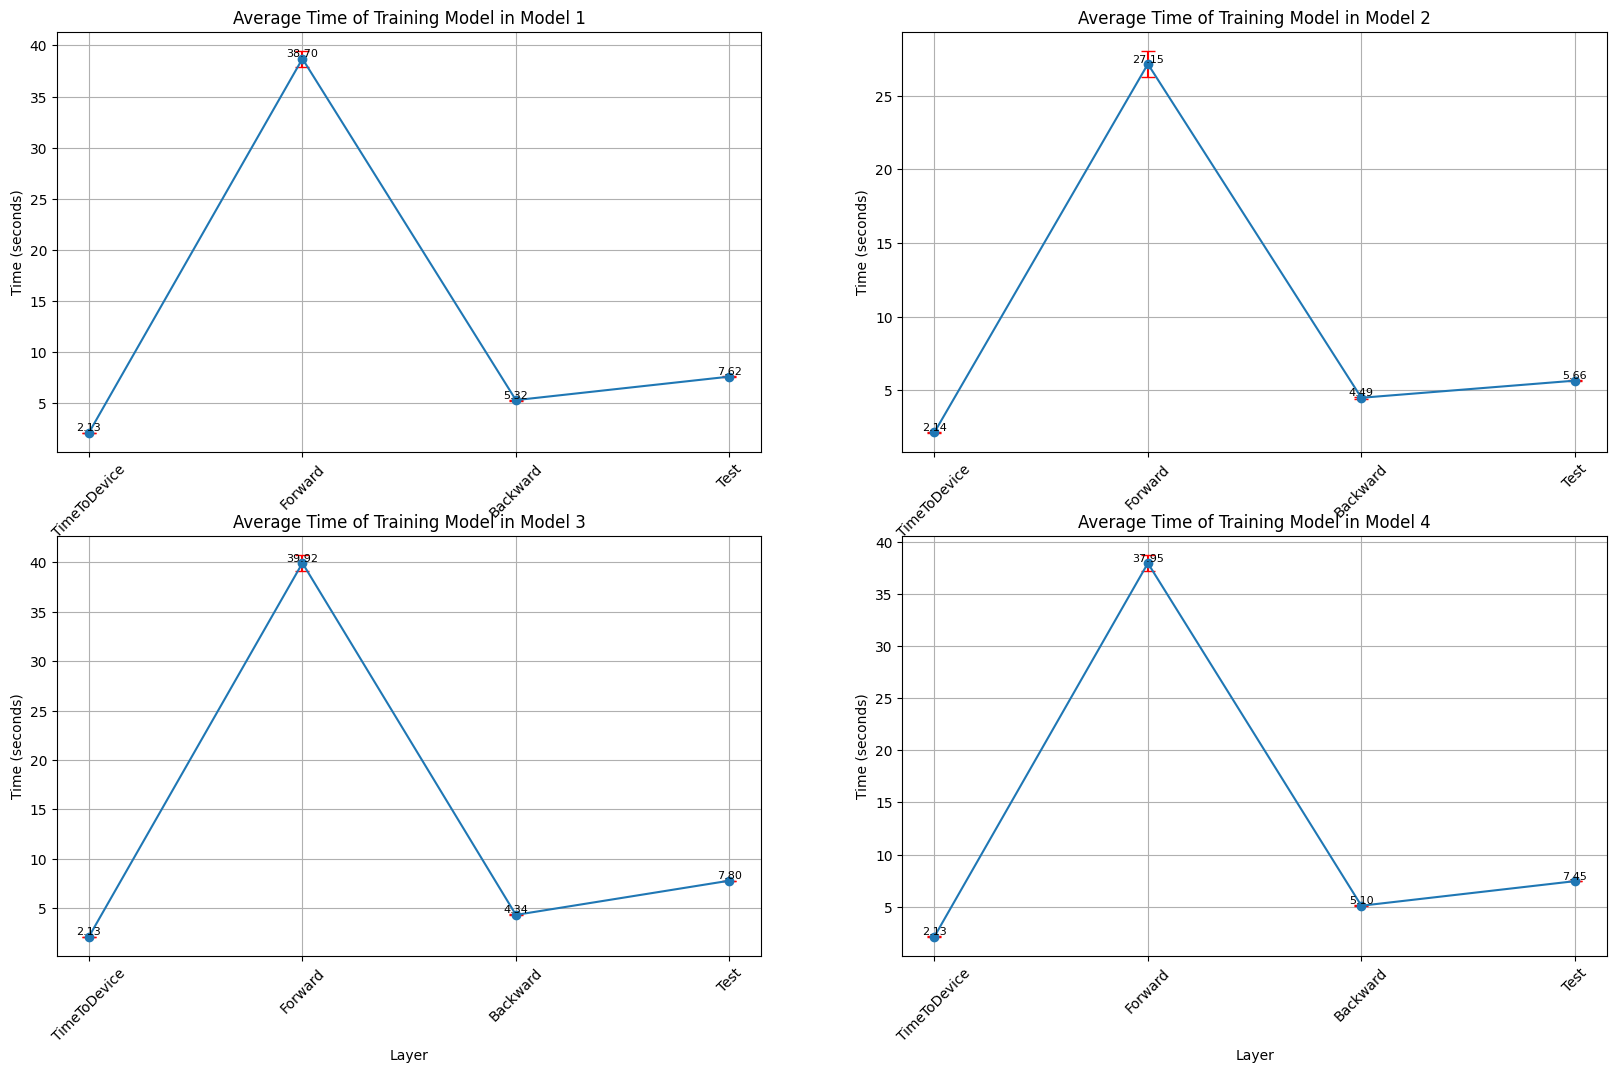

In [38]:
# set one figure has 4 subplots, and each subplot has the data of mean and std of the time for each layer
fig, axs = plt.subplots(2, 2, figsize=(20, 12))
for i, ax in enumerate(axs.flat):
    TrainPartTimei = TrainPartTime_flist[i]
    # Calculate the mean and standard deviation for each layer
    TrainPartTimei_means = np.mean(TrainPartTimei, axis=1)
    TrainPartTimei_stds = np.std(TrainPartTimei, axis=1)

    # Plot the average time per layer with error bars
    ax.errorbar(TrainPartName, TrainPartTimei_means, yerr=TrainPartTimei_stds, fmt='-o', ecolor='r', capsize=5)
    ax.set_title(f'Average Time of Training Model in Model {i+1}')
    ax.set_xlabel('Layer')
    ax.set_ylabel('Time (seconds)')
    ax.set_xticklabels(TrainPartName, rotation=45)
    ax.grid(True)
    for i, mean in enumerate(TrainPartTimei_means):
        ax.text(i, mean, f'{mean:.2f}', ha='center', va='bottom', fontsize=8)

#### EnergyEpoch

In [39]:
EpochEnergy_flist = [EpochEnergy_mod1f, EpochEnergy_mod2f, EpochEnergy_mod3f, EpochEnergy_mod4f]
# print(EpochEnergy_flist)
EpochEnergy_f = np.zeros((4, epochs[0]))
# print(EpochEnergy_f)

In [40]:
for i in range(len(EpochEnergy_flist)):
    for epoch in range(len(EpochEnergy_flist[i])):
        EpochEnergy_fi = EpochEnergy_flist[i]
        epoch_energy = EpochEnergy_fi[epoch][0]
#         # print(f'The energy of epoch {i} is {epoch_energy}')
        epoch_total_energy = sum(epoch_energy)
#         print(f'The total energy of epoch {epoch} is {epoch_total_energy:.2f}') 
        epoch_total_energy = np.round(epoch_total_energy, 2)
        EpochEnergy_f[i, epoch] = epoch_total_energy
print(f'The total energy of each epoch in the model is {EpochEnergy_f}')

The total energy of each epoch in the model is [[12221.33 12359.97 12458.68]
 [ 8526.83  8546.5   8648.56]
 [12528.29 12650.6  12372.56]
 [12028.69 12171.32 12272.  ]]


In [41]:
Model_type = ['Model1', 'Model2', 'Model3', 'Model4']

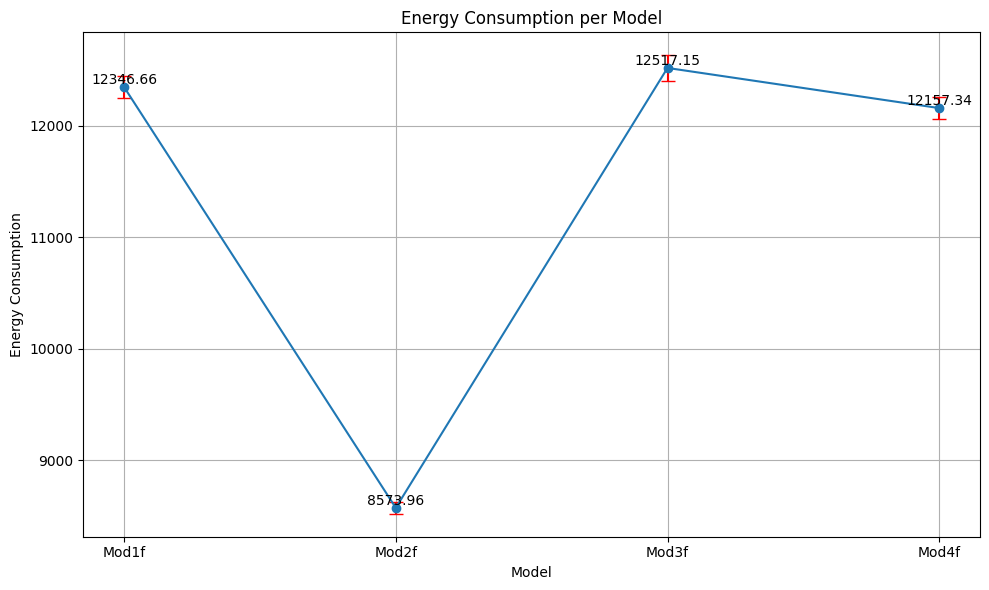

In [42]:
# Define the function to plot energy consumption
def plot_energy_consumption(EpochEnergy_f, title):
    epoch_means = np.mean(EpochEnergy_f, axis=1)
    epoch_stds = np.std(EpochEnergy_f, axis=1)
    
    plt.errorbar(np.arange(1, 5), epoch_means, yerr=epoch_stds, fmt='-o', ecolor='r', capsize=5)
    plt.title(title)
    plt.xlabel('Model')
    plt.ylabel('Energy Consumption')
    plt.xticks(np.arange(1, 5), ['Mod1f', 'Mod2f', 'Mod3f', 'Mod4f'])
    plt.grid(True)
    
    for i, mean in enumerate(epoch_means):
        plt.text(i + 1, mean, f'{mean:.2f}', ha='center', va='bottom')

# Plot the energy consumption
plt.figure(figsize=(10, 6))
plot_energy_consumption(EpochEnergy_f, 'Energy Consumption per Model')
plt.tight_layout()
plt.show()

### cifar100

In [43]:
# read all the files in all the folders
# TrainPartTime
TrainPartTime_mod1c = np.load(mod_path_c[0] / 'Train_part_time.npy', allow_pickle=True)
TrainPartTime_mod2c = np.load(mod_path_c[1] / 'Train_part_time.npy', allow_pickle=True)
TrainPartTime_mod3c = np.load(mod_path_c[2] / 'Train_part_time.npy', allow_pickle=True)
TrainPartTime_mod4c = np.load(mod_path_c[3] / 'Train_part_time.npy', allow_pickle=True)
# EpochTime
EpochTime_mod1c = np.load(mod_path_c[0] / 'Epoch_time.npy', allow_pickle=True)
EpochTime_mod2c = np.load(mod_path_c[1] / 'Epoch_time.npy', allow_pickle=True)
EpochTime_mod3c = np.load(mod_path_c[2] / 'Epoch_time.npy', allow_pickle=True)
EpochTime_mod4c = np.load(mod_path_c[3] / 'Epoch_time.npy', allow_pickle=True)
# EpochEnergy
EpochEnergy_mod1c = np.load(mod_path_c[0] / 'Epoch_energy.npy', allow_pickle=True)
EpochEnergy_mod2c = np.load(mod_path_c[1] / 'Epoch_energy.npy', allow_pickle=True)
EpochEnergy_mod3c = np.load(mod_path_c[2] / 'Epoch_energy.npy', allow_pickle=True)
EpochEnergy_mod4c = np.load(mod_path_c[3] / 'Epoch_energy.npy', allow_pickle=True)

In [44]:
TrainPartTime_clist = [TrainPartTime_mod1c, TrainPartTime_mod2c, TrainPartTime_mod3c, TrainPartTime_mod4c]

/tmp/ipykernel_48875/4007285993.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(TrainPartName, rotation=45)


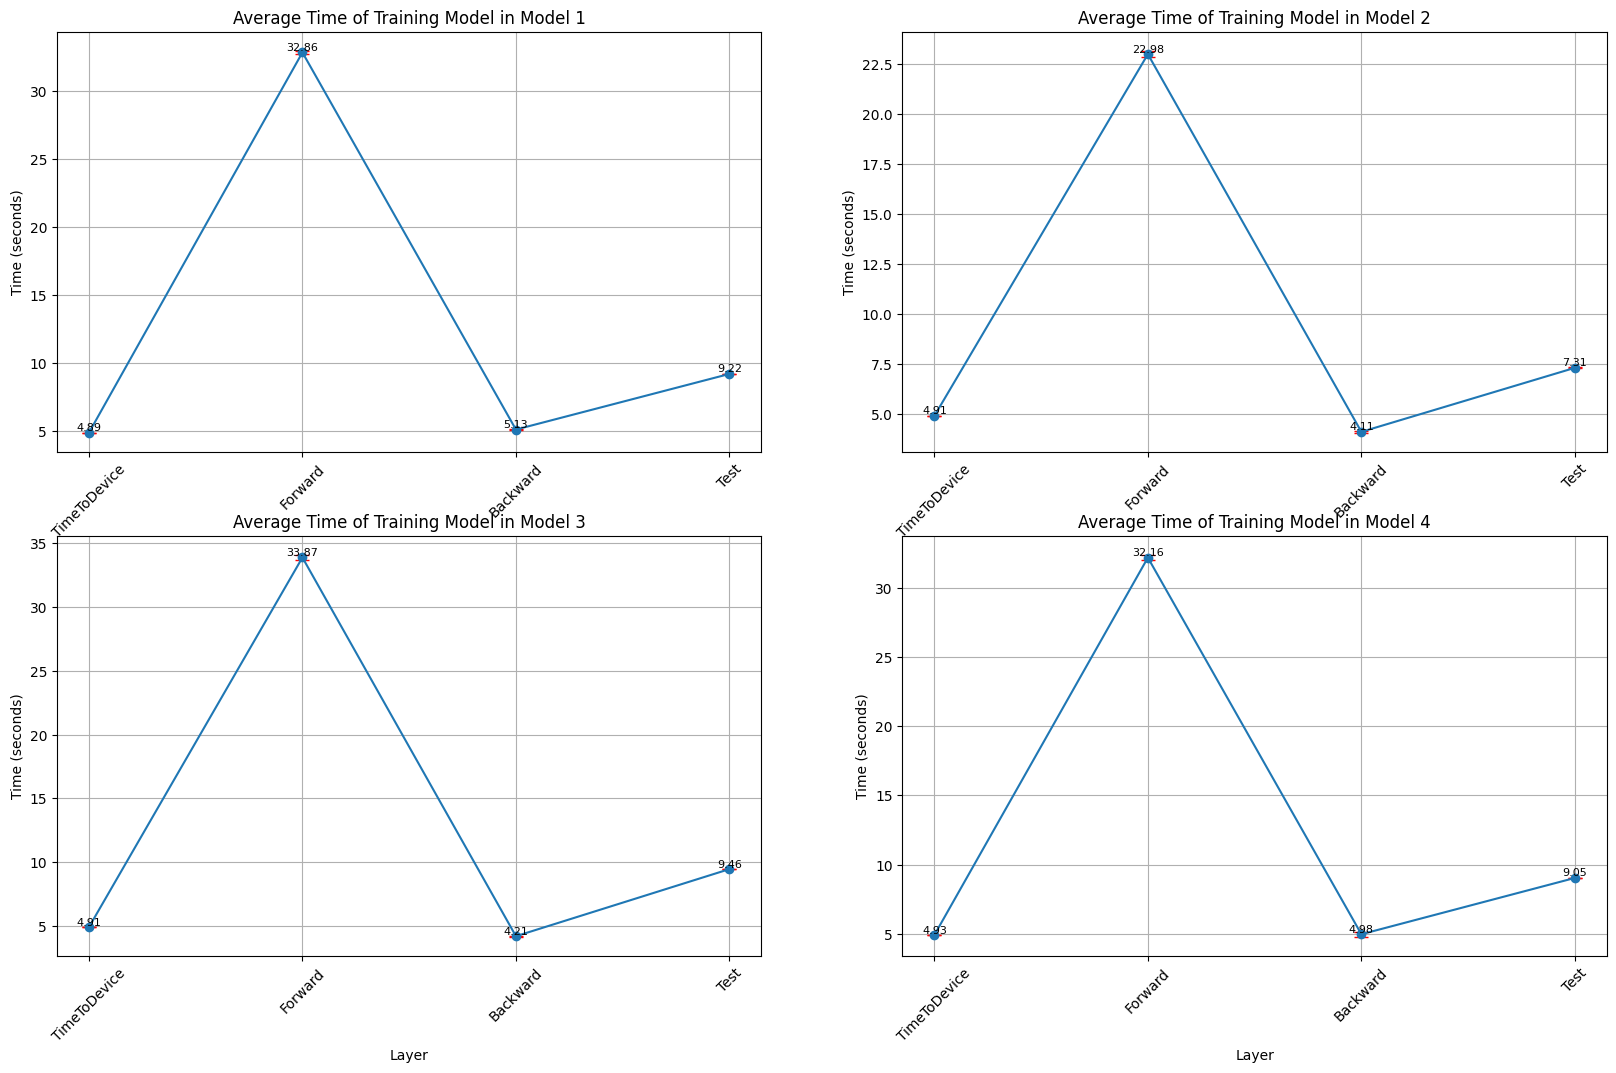

In [45]:
# set one figure has 4 subplots, and each subplot has the data of mean and std of the time for each layer
fig, axs = plt.subplots(2, 2, figsize=(20, 12))
for i, ax in enumerate(axs.flat):
    TrainPartTimei = TrainPartTime_clist[i]
    # Calculate the mean and standard deviation for each layer
    TrainPartTimei_means = np.mean(TrainPartTimei, axis=1)
    TrainPartTimei_stds = np.std(TrainPartTimei, axis=1)

    # Plot the average time per layer with error bars
    ax.errorbar(TrainPartName, TrainPartTimei_means, yerr=TrainPartTimei_stds, fmt='-o', ecolor='r', capsize=5)
    ax.set_title(f'Average Time of Training Model in Model {i+1}')
    ax.set_xlabel('Layer')
    ax.set_ylabel('Time (seconds)')
    ax.set_xticklabels(TrainPartName, rotation=45)
    ax.grid(True)
    for i, mean in enumerate(TrainPartTimei_means):
        ax.text(i, mean, f'{mean:.2f}', ha='center', va='bottom', fontsize=8)

In [46]:
EpochEnergy_clist = [EpochEnergy_mod1c, EpochEnergy_mod2c, EpochEnergy_mod3c, EpochEnergy_mod4c]
# print(EpochEnergy_flist)
EpochEnergy_c = np.zeros((4, epochs[0]))
# print(EpochEnergy_f)

In [47]:
for i in range(len(EpochEnergy_clist)):
    for epoch in range(len(EpochEnergy_clist[i])):
        EpochEnergy_ci = EpochEnergy_clist[i]
        epoch_energy = EpochEnergy_ci[epoch][0]
#         # print(f'The energy of epoch {i} is {epoch_energy}')
        epoch_total_energy = sum(epoch_energy)
#         print(f'The total energy of epoch {epoch} is {epoch_total_energy:.2f}') 
        epoch_total_energy = np.round(epoch_total_energy, 2)
        EpochEnergy_c[i, epoch] = epoch_total_energy
print(f'The total energy of each epoch in the model is {EpochEnergy_c}')

The total energy of each epoch in the model is [[11515.31 11319.54 11216.8 ]
 [ 8246.4   8151.8   8034.44]
 [11461.04 11277.36 11198.14]
 [11344.75 11255.05 10992.29]]


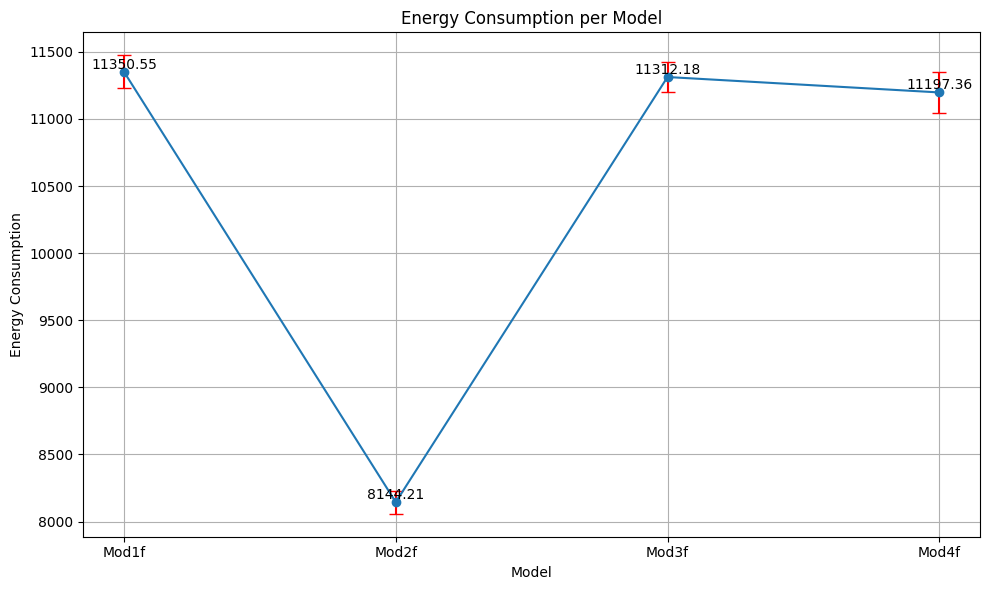

In [48]:
# Define the function to plot energy consumption
def plot_energy_consumption(EpochEnergy_c, title):
    epoch_means = np.mean(EpochEnergy_c, axis=1)
    epoch_stds = np.std(EpochEnergy_c, axis=1)
    
    plt.errorbar(np.arange(1, 5), epoch_means, yerr=epoch_stds, fmt='-o', ecolor='r', capsize=5)
    plt.title(title)
    plt.xlabel('Model')
    plt.ylabel('Energy Consumption')
    plt.xticks(np.arange(1, 5), ['Mod1f', 'Mod2f', 'Mod3f', 'Mod4f'])
    plt.grid(True)
    
    for i, mean in enumerate(epoch_means):
        plt.text(i + 1, mean, f'{mean:.2f}', ha='center', va='bottom')

# Plot the energy consumption
plt.figure(figsize=(10, 6))
plot_energy_consumption(EpochEnergy_c, 'Energy Consumption per Model')
plt.tight_layout()
plt.show()